# Markov chain Monte Carlo–based Bayesian data analysis for type Ia Supernovae 

Author: Olesya Galkina

## Abstract

The Hubble constant $H_0$ is a fundamental parameter in cosmology, important for understanding the rate of expansion of the Universe. However, significant discrepancies have emerged between the $H_0$ values derived from the Cosmic Microwave Background (CMB) measurements by the Planck satellite and those obtained from the local distance ladder technique, by the SH0ES collaboration. This discord, known as the "Hubble tension," suggests potential gaps in our current cosmological model. This project employs a Markov chain Monte Carlo (MCMC)–based Bayesian data analysis on type Ia Supernovae to estimate $H_0$. The analysis involves exploratory data analysis, defining key cosmological functions, applying Bayesian inference, and sampling the posterior distribution of $H_0$ using MCMC. The results are visualized and the MCMC chains' convergence is assessed through autocorrelation analysis. 

## Introduction

The purpose of this project is to constrain a set of cosmological parameters by performing a Bayesian likelihood analysis using the Markov chain Monte Carlo (MCMC) method. The MCMC method and Bayesian statistics are two independent disciplines: the former is a method for sampling from a distribution, while the latter is a theory for interpreting observed data.

The Hubble constant $H_0$ is one of the most important numbers in cosmology because it tells us how fast the universe is expanding, which can be used to determine the age of the universe and its history. Figuring out the true value of the Hubble constant is one of the greatest challenges in modern astronomy. While the Planck satellite mission, which analyzed the CMB, reported a value of $H_0$ around $67$ km/s/Mpc, independent measurements using the local distance ladder technique, such as the SH0ES collaboration, have consistently obtained higher values, closer to $73$ km/s/Mpc. Although these differences seem small, even a $2$ km/s/Mpc discrepancy between predictions from physics and observations implies there could be something major missing from our current understanding of the universe. This discrepancy often referred to as the “Hubble tension” ou Cosmological crises. 

This project is organizes as followed:
1. Exploratory data analysis: initial analysis and visualization of the data.
2. Luminosity distance and distance modulus functions: mathematical functions essential for analyzing supernova data.
3. Bayesian analysis: framework for statistical inference, combining prior information with data likelihood.
4. Samplying the posterior using MCMC: generating samples from the posterior distribution of $H_0$ using MCMC techniques.
5. Plotting the results: visualization of the posterior distribution.
6. Autocorrelation analysis and convergence: assessing the quality and convergence of the MCMC samples.
7. References.
   

## Exploratory data analysis 

We begin our analysis by loading all the necessary libraries and packages.

In [2]:
import pandas as pd
import numpy as np
import math

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import constants

# For analysing Monte Carlo samples
import emcee
from emcee import EnsembleSampler

# For plotting Monte Carlo samples
import getdist
from getdist import plots

In this work, we use the latest data from the Pantheon+SH0ES collaboration, which provides light curve measurements of supernova objects. The data set is available [here](https://github.com/PantheonPlusSH0ES/DataRelease/tree/main).

In [3]:
# Load the data

file_path = "/home/olesya/Документы/A_Rabota/Rabota/Cosmological Tensions/Data/Pantheon+SH0ES.dat"
df = pd.read_csv(file_path, delimiter='\s+')

df.shape

(1701, 47)

In [4]:
df.head(10)

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.8859,0.864470,0.0991,1.4960,0.0381,0.005,1.0,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.3064,0.812220,0.0971,1.4960,-0.0252,0.003,1.0,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.5000,0.000358,0.0399,0.7134,0.0545,0.019,1.0,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.1220,0.000193,0.0931,0.7134,0.0622,0.028,1.0,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.8390,0.988740,0.0567,0.6110,0.0650,0.009,1.0,0.006
5,1981B,50,0.00317,0.00084,0.00350,0.00001,0.00236,0.00001,11.54160,0.613941,...,0.2973,41,43.2260,0.376420,0.0732,0.5763,0.0206,0.007,1.0,0.013
6,2013aa,56,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.20740,0.594070,...,0.1580,31,27.5263,0.645500,0.1104,0.5586,0.0298,0.003,1.0,0.003
7,2013aa,5,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.29980,0.579622,...,0.1190,56,35.0505,0.987280,0.0620,0.5586,0.0727,0.007,1.0,0.003
8,2017cbv,5,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.14830,0.577815,...,0.0381,94,69.7345,0.971300,0.0580,0.5586,0.0516,0.004,1.0,0.003
9,2017cbv,18,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.25770,0.577916,...,0.0500,92,45.1690,0.999990,0.0607,0.5586,0.0216,0.003,1.0,0.003


We are interested in following parameters:

 - `zHD` Hubble Diagram Redshift $z$ (with CMB and VPEC corrections)  
 - `zHDERR` Hubble Diagram Redshift Uncertainty
 - `zHEL` heliocentric redshift $z_{hel}$
 - `zHELERR` heliocentric redshift uncertainty
 - `m_b_corr` corrected apparent $m_b$ magnitude.
 - `m_b_corr_err_DIAG` corrected $m_b$ magnitude uncertainty as determined from the diagonal of the covariance matrix. 

To understand the relationship between CMB-corrected redshift and observed magnitude, we use a scatter plot.

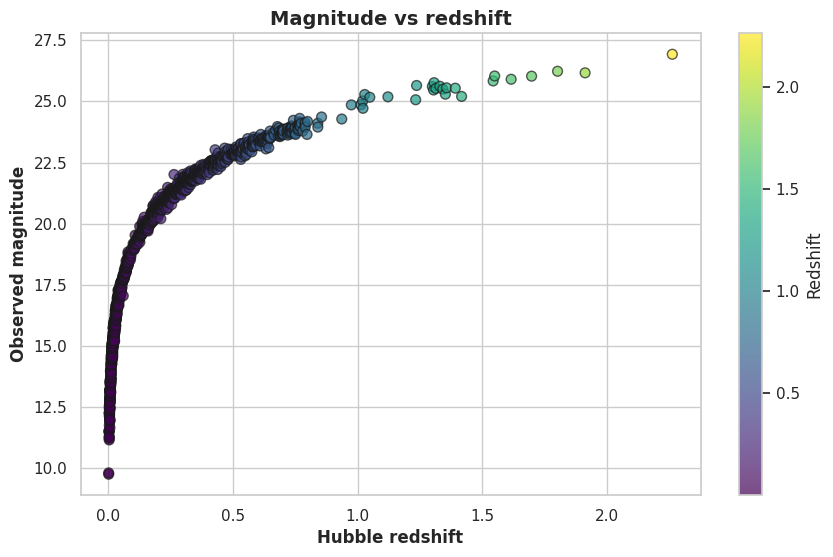

In [5]:
# Plot observed CMB corrected redshift vs observed magnitude

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['zHD'], df['m_b_corr'], c=df['zHD'], cmap='viridis', s=50, alpha=0.7, edgecolor='k')
cbar = plt.colorbar(scatter)
cbar.set_label('Redshift')

plt.title('Magnitude vs redshift', fontsize=14, fontweight='bold')
plt.xlabel('Hubble redshift', fontsize=12, fontweight='bold')
plt.ylabel('Observed magnitude', fontsize=12, fontweight='bold')
plt.grid(True)
plt.savefig('Magnitude vs redshift.png')

plt.show()

The observed magnitude increases as the Hubble redshift increases. This trend confirms that supernovae with higher redshifts (farther away in the universe) appear dimmer (higher magnitude). In other words, as the universe expands, light from distant supernovae is redshifted, and these supernovae appear dimmer.

At low redshift, there is a high concentration of observations for nearby supernovae. The density of points decreases as the redshift increases, which is expected since more distant supernovae are harder to observe.

It's important to note that a few points at higher redshifts and magnitudes stand out, but these are not outliers. This pattern is typical due to observational limits.

To indicate the uncertainty in the measurements, we add the error bars to the plot.

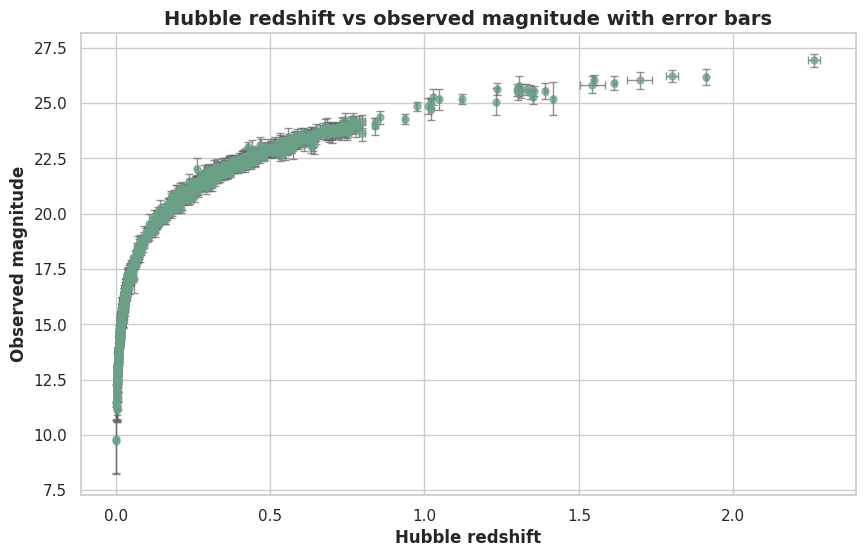

In [6]:
# Plot with error bars

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
green_color='#6ca188'
dark_gray='#636363'
plt.errorbar(df['zHD'], df['m_b_corr'], xerr=df['zHDERR'], yerr=df['m_b_corr_err_DIAG'], fmt='o', alpha=0.7,
             capsize=3, markersize=5, color=green_color, ecolor=dark_gray, elinewidth=1, capthick=1)
plt.title('Hubble redshift vs observed magnitude with error bars', fontsize=14, fontweight='bold')
plt.xlabel('Hubble redshift', fontsize=12, fontweight='bold')
plt.ylabel('Observed magnitude', fontsize=12, fontweight='bold')
plt.grid(True)
plt.savefig('Magnitude vs redshift error bars.png')

plt.show()

The error bars extending from each data point represent the uncertainty or error in the measurements, where the vertical error bars show the uncertainty in the observed magnitude, while the horizontal show the uncertainty in the redshift measurements.

The size of the error bars indicate the precision and reliability of the measurements. Larger error bars suggest more uncertainty in those particular measurements. At lower redshifts, the error bars tend to be smaller, indicating more precise measurements. At higher redshifts, the error bars are generally larger, indicating greater uncertainty.

The cosmographic expansion could be problematic if extended to high redshifts. In order to avoid these possible issues we work with redshift $z_{HD}$ in the range $0.023<z<0.15$, where the minimum redshift is large enough in order to reduce the impact of cosmic variance.

In [7]:
# Verify the total range

print('The Hubble diagram redshift range is: ', df['zHD'].min(), '< z <', df['zHD'].max())

The Hubble diagram redshift range is:  0.00122 < z < 2.26137


In [8]:
# Assign values in the selected range to 'z-values' 

z_values = df.loc[(df['zHD'] > 0.023) & (df['zHD'] < 0.15), 'zHD'].to_numpy()

z_values.shape

(496,)

We have $496$ values out of $1701$ in this range.

Let's visualize redshift distribution in the selected range.

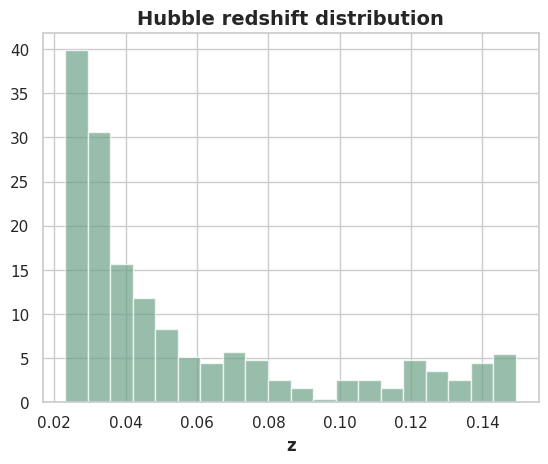

In [9]:
data = df.loc[(df['zHD'] > 0.023) & (df['zHD'] < 0.15), 'zHD']
num_bins = 20
n, bins, patches = plt.hist(data, num_bins, 
                            density = 1, 
                            color =green_color,
                            alpha = 0.7)
plt.title('Hubble redshift distribution', fontsize=14, fontweight='bold')
plt.xlabel('z', fontsize=12, fontweight='bold')
plt.savefig('Hubble redshift distribution.png')

plt.show()

The distribution is heavily skewed towards lower redshift values. The first few bins, corresponding to low redshifts (0.02 to 0.05), contain the highest number of objects. Beyond $z=0.08$, the number of objects decreases substantially. This distribution is typical for many astronomical surveys, where there are more nearby objects observed because they are easier to detect and measure.

Let's select others parameters in this range.

In [10]:
# Selects values from specific columns 

def select_values_in_range(df, column_name, lower_bound, upper_bound, other_columns):
    selected_rows = df.loc[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
    selected_values = selected_rows[other_columns]
    
    return selected_values

In [11]:
# Define the columns we want to select

other_columns = ['zHDERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG']  

In [12]:
# Call the function

selected_values = select_values_in_range(df, 'zHD', 0.023, 0.15, other_columns)
selected_values

,zHDERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG
330,0.00086,0.02341,0.00009,15.7320,0.188819
331,0.00086,0.02338,0.00006,15.5136,0.339266
332,0.00085,0.02233,0.00004,15.7695,0.269874
333,0.00087,0.02315,0.00015,15.6300,0.273642
334,0.00085,0.02237,0.00001,15.6638,0.176470
...,...,...,...,...,...
821,0.00108,0.14896,0.00050,19.9755,0.183004
822,0.00096,0.14927,0.00004,19.7852,0.155606
823,0.00108,0.14915,0.00050,19.7709,0.140105
824,0.00096,0.15021,0.00002,19.9076,0.172844


## The luminosity distance

The luminosity distance is a very important notion of distance for observation. It is based on the knowledge of the intrinsic luminosity _L_ of a source, which is therefore called _standard candle_. Type Ia supernovae are standard candles, for example.


The luminosity distance $d_{L}(z, z_{hel})$ in a flat expanding Friedmann-Lemaitre-Robertson-Walker universe is defined as:
$$
d_{L}(z, z_{hel})=\frac{1+z_{hel}}{1+z}d_L(z),
$$
with

$$
d_{L}(z)=\frac{c}{H_0}\left[z+\frac{1}{2}(1-q_0)z^2-\frac{1}{6}(3q_0^2+q_0-j_0-1)(z^3)\right], 
$$

where $z_{hel}$  is heliocentric redshift, $H_0$ is the Hubble constant, $q_0$ is a deceleration parameter and $j_0$ is a "jerk parameter" (third order derivative parameter).

Let's calculate the luminosity distance (up to second order) assuming the value of the Hubble constant $H_0$ as measured by the _SH0ES_ collaboration and the following parameters:

We use NumPy to perform vectorized operations and avoid using explicit loops.

In [13]:
# Function to calculate the luminosity distance d_L(z) 
cc = constants.c/1000.
j0 = 1

def lum_distance(z,H0,q0):
    dL = cc*z*(1+(1-q0)*(z/2)+(3*q0**2+q0-j0-1)*((z**2)/6))/H0
    return dL

In [17]:
# Transform to NumPy array

z_hel = selected_values['zHEL'].to_numpy()

In [20]:
# Calculate the luminosity distance d_L(z,z_hel)

def lum_distance_total(z,z_hel,H0,q0):
    dL_total = ((1+z_hel)/(1+z)) * lum_distance(z,H0,q0)
    return dL_total

Now, having calculated the luminosity distance, we proceed to visualize it by plotting with a logarithmic scale on the y-axis, utilizing the `matplotlib`'s `semilogy` function. We fix $H_0$, $q_0$ e $j_0$.

In [ ]:
# Plot CMB redshift vs luminosity distance 

plt.figure(figsize=(5, 4))
plt.semilogy(z_values, lum_distance(z_values,73,-0.55,1))
plt.title('CMB corrected redshift vs observed magnitude')
plt.xlabel('CMB Redshift')
plt.ylabel('Magnitude')
plt.grid(False)

plt.show()

## Distance modulus

The distance modulus $\mu$ of a supernova at redshift $z$ is defined as:

$$
\mu=m_B-M_B=5\log_{10}\left(\frac{d_{L}(z,z_{hel})}{1 Mpc}\right)+25,
$$

where $m_B$ is apparent magnitude and $M_B$ is the absolute magnitude (the hypothetical apparent magnitude of an object as if it were at a distance of $10$ $pc$). We use the Megaparsec ($Mpc$) as a more appropriate distance scale for cosmology.

In [21]:
# Transform selected_values['m_b_corr'] to NumPy array

m_data = selected_values['m_b_corr'].to_numpy()
print(m_data.shape)

(496,)


In [22]:
# Function to calculate the magnitude m_B

def magnitude(z, z_hel, H0, q0, M_B=-19.258):
    lum_dist = lum_distance_total(z, z_hel, H0, q0)
    m_B = 5 * np.log10(lum_dist) + 25 + M_B
    return m_B

Now we have theoretical apparent magnitude values that allow us to compare them with the observed ones. 

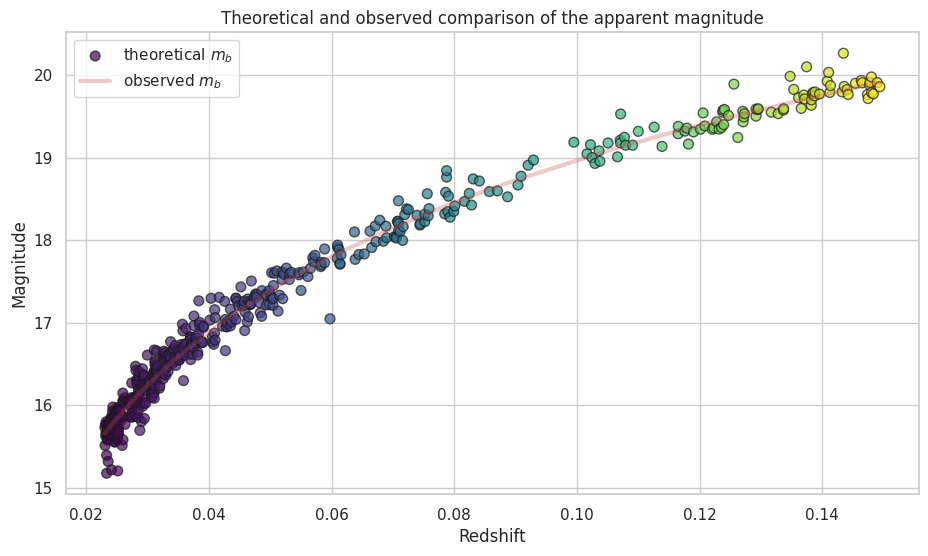

In [26]:
# Theoretical-observed comparison plot of the apparent magnitude

plt.figure(figsize=(11,6))

plt.scatter(z_values, selected_values['m_b_corr'], c=z_values, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
plt.plot(z_values, magnitude(z_values, z_hel, 73,-0.55, M_B=-19.258), "r", alpha=0.3, lw=3)
plt.title("Theoretical and observed comparison of the apparent magnitude")
legend = ("theoretical $m_b$","observed $m_b$")
plt.legend(legend)
plt.xlabel('Redshift')
plt.ylabel('Magnitude')
plt.savefig('Theoretical-observed magnitude.png')

## Bayesian analysis

### Chi-square $\chi^2$ statistic

The $\chi^2$ function defined as

$$
\chi^2_{sne}(H_0,q_0,j_0)=\left[\mu_{i,data}-\mu_{model}(z_i)\right]\Sigma^{-1}_{sne,ij}\left[\mu_{j,data}-\mu_{model}(z_j)\right],
$$

where $\mu_{i,data}$ and $\mu_{model}(z_i)$ are the _observed_ and _predicted_ distance moduli at the redshift $z_i$, respectively; $\Sigma^{-1}_{sne,ij}$ is the supernova covariance matrix from the Pantheon+ SH0ES collaboration (considering both statistical and systematic errors). First, we explore the covariance matrix.


The format of the covariance (.cov) file is NxN lines, where the first line gives the number of rows/columns in the matrix ($N=1701$). We are interested in the Statistical+Systematic covariance matrix `STAT+SYS`, it includes all the covariance between SNe (and also Cepheid host covariance) due to systematic uncertainties. Let's import the matrix and transform it into a Numpy array format.

In [29]:
# Load the covariant matrix

path = "/home/olesya/Документы/A_Rabota/Rabota/Cosmological Tensions/Data/Pantheon+SH0ES_STAT+SYS.cov"
cov_matrix = np.loadtxt(path)
n_sne = int(cov_matrix[0])
cov_matrix = cov_matrix[1:].reshape((n_sne, n_sne))

In [30]:
cov_matrix.shape

(1701, 1701)

In [31]:
# Get the indices of z_values in the original dataframe
selected_indices = df[(df['zHD'] > 0.023) & (df['zHD'] < 0.15)].index

# Select the corresponding rows and columns from the covariance matrix
cov_matrix_selected = cov_matrix[selected_indices][:, selected_indices]

# Verify the shape of the selected covariance matrix
cov_matrix_selected.shape

(496, 496)

### Likelihood function

We define the likelihood $\mathcal{L}_{sne}$ using the $\chi^2$ :

$$
\mathcal{L}_{sne}(H_0,q_0,j_0)=\mathcal{N}e^{-\frac{1}{2}\chi^{2}},
$$

where $\mathcal{N}=|2\pi\Sigma_{sne}|^{-\frac{1}{2}}$ is a normalization constant. The likelihood represents the probability of having a dataset given a cosmological model. We are interested in the contrary, i.e.
in the probability of having a certain cosmological model given a dataset. This is called **posterior probability**. 

Let's compute the Gaussian log-likelihood for the _observed_ and _predicted_ apparent magnitude at the redshifts $z_i$ e $z_{hel}$. For now, we omit the normalization constant.

In [32]:
# Calculate the inverse of the covariance matrix  

cov_inv = np.linalg.inv(cov_matrix_selected)

In [33]:
# Function to compute the logarithm of the likelihood
# Input: vector of parameters H0, parameters q_0 and j_0
# Output: the value of the likelihood at the specified parameter values

def log_likelihood(parameters):
    M_B, H0, q0 = parameters
    m_modelo = magnitude(z_values, z_hel, H0, q0) #Calculate model magnitudes for observed data
    diff = m_data - m_modelo #residuals
    diff = np.array(diff)
    log_likelihood_values = -0.5 * np.dot(diff, np.dot(diff, cov_inv))
    
    return log_likelihood_values

In [34]:
# Check the function

parameters = [-19.3,73,-0.55]
log_likelihood(parameters)

-217.76527386293392

In [35]:
# Fix the parameters 

q0_fix = -0.55

H0_range = np.linspace(65,85,25)

In [ ]:
# Plot Chi-squared vs H_0

plt.plot(H0_range, -2. * log_likelihood(H0_range, q0_fix,j0_fix))
plt.ylabel(r'$\chi^2$')
plt.xlabel(r'$H_0$')

### Posterior probability 

According to Bayes Theorem, the posterior probability is given by

$$ 
P(\theta|d) = \frac{P(d|\theta)P(\theta)}{P(d)}, 
$$

where:
- $\theta$ is the cosmological parameters and  $d$ is the observed data, or samples. 
- $P(\theta|d)$ is the posterior probability for $\theta$, and it represents our degree of belief about the value of $\theta$ after we have seen the data $d$. 
- $P(d|\theta)=\mathcal{L}(\theta)$ is the likelihood function we already encountered. It is the probability of the data given a certain value of the parameters.
- $P(\theta)$ is the prior probability distribution. It represents our degree of belief in the value of $\theta$ before we see the data (hence the name).
- $P(d)$ is a normalizing constant, or the evidence, it ensures that the posterior is normalized to unity:$$ P(d)=\int d \theta P(d|\theta)P(\theta).$$


In our case, the posterior probability for $H_0$, $q_0$ and $j_0$ is given by
$$ 
P(H_0,q_0,j_0|SN) = \frac{P(H_0)P(q_0)P(j_0)\mathcal{L}((H_0,q_0,j_0))}{\mathcal{E}}, 
$$

where $\mathcal{E}$ is the evidence.

From now on, we use logarithm of probabilities to compute the log of posterior probability.

The log-prior probability is assumed to be zero if all the parameters are within their bounds and $-\infty$ if any of the parameters are outside their bounds.

In [36]:
# Compute the logarithm of the prior probability
# Input: H0 vector of parameters, parameters q_0 and j_0
# Output: the value of the prior at the specified parameter values

def log_uniprior(parameters):
    M_B, H0, q0 = parameters
    if (65 < H0 < 85) and (-10 < q0 < 10):
        return 0.0
    return -np.infty

In [37]:
parameters = [-19.3,73,-0.55]
log_uniprior(parameters)

0.0

In [38]:
# Compute log_normal prior
# Input: H0 vector of parameters, parameters q_0 and j_0
# Output: the value of the posterior at the specified parameter values

def log_normal(parameters):
    M_B, H0, q0 = parameters
    mu = -19.258    #mean value
    sigma = 0.032   #standard deviation
    log_prior = -0.5 * ((M_B - mu) / sigma)**2 
    return log_prior 

In [39]:
parameters = [-19.23,73,-0.55]
log_normal(parameters)

-0.38281249999996425

The posterior distribution combines the uniprior, gaussian prior and the likelihood. It outputs negative infinity if the parameters lie outside the range of the prior.

In [40]:
# Compute log_posterior 
# Input: vector of parameters
# Output: the value of the posterior at the specified parameter values

def log_posterior(parameters):
    M_B, H0, q0 = parameters
    lu = log_uniprior(parameters)
    normal = log_normal(parameters)
    if not (np.isfinite(lu) and np.isfinite(normal)):
        return -np.inf
    return log_likelihood(parameters) + lu + normal

In [41]:
parameters = [-19.3,73,-0.55]
log_posterior(parameters)

-218.62660198793398

## Samplying the posterior function using MCMC

In this section we will sample the posterior probability using the `emcee` package to implement the Markov Chain Monte Carlo (MCMC) method. 

The purpose of a Markov chain Monte Carlo algorithm is to construct a sequence of points (or “samples”) in parameter space (called “a chain”). The crucial property of the chain is that the density of samples is proportional to the posterior pdf. This allows to construct a map of the posterior distribution.

To sample the posterior we use `emcee`, an open-source sampler for MCMC, and for analyzing the chains we use `getdist`. `emcee` requires a function that returns the log-posterior probability.

First, we define two key variables: `ndim` and `nwalkers`. The `nwalkers` variable is the number of "walkers" (different Markov Chains that run in parallel). 

In [42]:
# Set initial parameters
initial_parameters = [-19.3, 73.04, q0_fix]  

nwalkers = 10
nsteps = 20000

# Generate initial values for each walker
initial_positions = [initial_parameters + 1e-4*np.random.randn(3) for _ in range(nwalkers)]

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, len(initial_parameters), log_posterior)
sampler.run_mcmc(initial_positions, nsteps, progress=True)

# Get Markov chains
samples = sampler.get_chain()

# Print the results
print("Samples shape:", samples.shape)


100%|██████████| 20000/20000 [02:47<00:00, 119.57it/s]

Samples shape: (20000, 10, 3)


The walkers start in small distributions around the maximum likelihood values and then they quickly wander and start exploring the full posterior distribution. In fact, after fewer than 50 steps, the samples seem pretty well “burnt-in”. That is a hard statement to make quantitatively, but we can look at an estimate of the integrated autocorrelation time:

In [43]:
tau = sampler.get_autocorr_time()
print(tau)

[46.55360685 44.77817085 46.49987295]


This suggests that about 45 steps are needed for the chain to “forget” where it started.

## Plotting the results

Now we have the list of samples, let’s make a corner plot. 

Removed no burn in


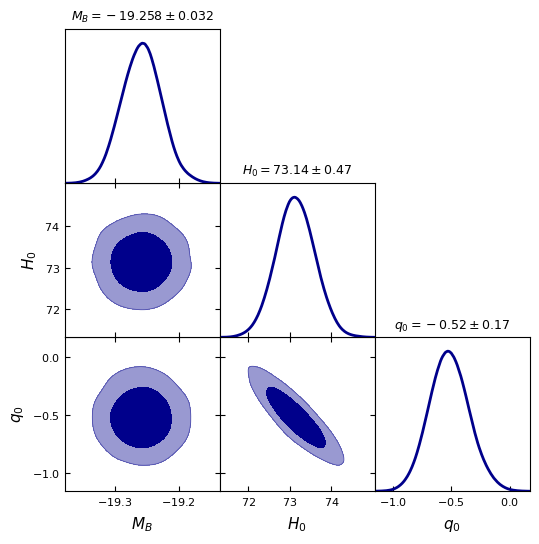

In [44]:
# Get the samples
samples = sampler.get_chain(discard=2000, thin=15, flat=True) 

# Set labels for parameters
param_names = ['M_B', 'H_0', 'q_0']

# Create an MCSamples object with the samples
mcsamples = getdist.MCSamples(samples=samples, names=param_names, labels=param_names)

# Plot the triplot
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 12
g.triangle_plot(mcsamples, filled=True, line_args=[{'lw':2, 'color':'darkblue'}], 
                contour_colors=['darkblue'], title_limit=1)

g.set_axes(labelLines = param_names)

plt.show()
g.export('triplot.png')

This is the "corner plot" or "triangle plot", which is typically used to visualize the posterior distributions of parameters and their correlations in Bayesian data analysis. It shows the results of an MCMC analysis for parameters related to type Ia Supernovae ($M_B$ and $j_0$) and the Hubble constant $H_0$. 

The diagonal panels show the marginal posterior distributions of each parameter individually. The marginal posterior of $M_B$, indicating the distribution of this parameter. The mean and the 1-$\sigma$ uncertainty are $M_{B}=−19.258±0.032$. For the Hubble constant: $H_{0}=73.14±0.47$ km/s/Mpc.  And for $q_0$: $q_{0}=−0.52±0.17$. The contours in the off-diagonal panels show regions of higher probability density, indicating where the parameter values are more likely to lie based on the data.

The off-diagonal panels show the joint posterior distributions of pairs of parameters, providing insights into their correlations. 

Top-middle: the joint distribution of $M_B$ and $H_0$. The contours are roughly circular, suggesting a weak or no correlation.
     
Top-right: The joint distribution of $M_B$ and $q_0$. The contours are roughly circular, suggesting a weak or no correlation.
     
Middle-right: The joint distribution of $H_0$ and $q_0$. The contours are elliptical, indicating some level of correlation between these parameters.

In [45]:
marg = mcsamples.getMargeStats()
print(marg)

Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
M_B        -1.9258324E+01  3.1575672E-02 -1.9290057E+01 -1.9227067E+01  two   -1.9319649E+01 -1.9195225E+01  two   -1.9340538E+01 -1.9174685E+01  two     M_B
H_0         7.3138458E+01  4.7105320E-01  7.2676674E+01  7.3609136E+01  two    7.2212653E+01  7.4058905E+01  two    7.1906671E+01  7.4367957E+01  two     H_0
q_0        -5.1772547E-01  1.7193799E-01 -6.8868167E-01 -3.4817621E-01  two   -8.4553302E-01 -1.6958020E-01  two   -9.4814616E-01 -5.8392124E-02  two     q_0



The corner plot shows all the one and two dimensional projections of the posterior probability distributions of the parameters. And it demonstrates all of the covariances between parameters. 

The uncertainties based on the 68th, 95th, and 99.7 percentiles of the samples in the marginalized distributions: 

In [46]:
from IPython.display import display, Math

labels=param_names

for i in range(3):
    mcmc = np.percentile(samples[:, i], [68, 95, 99.7])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Autocorrelation analysis and convergence

Autocorrelation analysis is necessary in this project to ensure that the MCMC chains used for estimating the Hubble constant have properly converged and that the samples are representative of the true posterior distribution. MCMC algorithms generate samples from the posterior distribution through a stochastic process, which means the samples are not independent. To make valid inferences, it's essential to ensure that the chain has converged to the target distribution.

Autocorrelation analysis helps to determine if the chain has converged by examining the correlation between samples at different steps. Low autocorrelation indicates that the chain has mixed well and provides samples representative of the posterior distribution. High autocorrelation means fewer effective samples, which can lead to less precise estimates and wider credible intervals.    

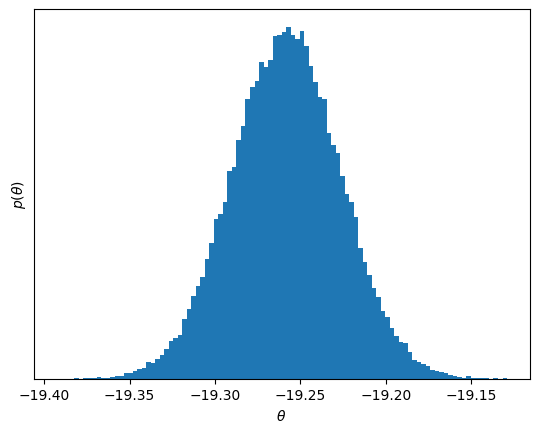

In [47]:
# Marginalized density in the first dimension

chain = sampler.get_chain()[:, :, 0].T

plt.hist(chain.flatten(), 100)
plt.gca().set_yticks([])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$");

In [48]:
def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

In [49]:
def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))
    
    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

In [50]:
# Automated windowing procedure following Sokal (1989)

def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1

In [51]:
# Following the suggestion from Goodman & Weare (2010)

def autocorr_gw2010(y, c=5):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2 * np.cumsum(f) - 1
    window = auto_window(taus, c)
    return taus[window]

In [52]:
def autocorr_new(y, c=5.0):
    f = np.zeros(y.shape[1])
    for yy in y:
        f += autocorr_func_1d(yy)
    f /= len(y)
    taus = 2 * np.cumsum(f) - 1
    window = auto_window(taus, c)
    return taus[window]

In [53]:
# Compute the estimators for a few different chain lengths

N = np.exp(np.linspace(np.log(100), np.log(chain.shape[1]), 10)).astype(int)
gw2010 = np.empty(len(N))
new = np.empty(len(N))
for i, n in enumerate(N):
    gw2010[i] = autocorr_gw2010(chain[:, :n])
    new[i] = autocorr_new(chain[:, :n])

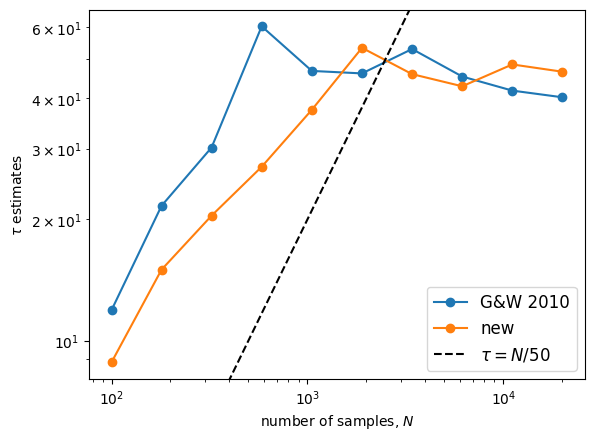

In [54]:
# Plot the comparisons

plt.loglog(N, gw2010, "o-", label="G&W 2010")
plt.loglog(N, new, "o-", label="new")
ylim = plt.gca().get_ylim()
plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
#plt.axhline(true_tau, color="k", label="truth", zorder=-100)
plt.ylim(ylim)
plt.xlabel("number of samples, $N$")
plt.ylabel(r"$\tau$ estimates")
plt.legend(fontsize=12);

## Conclusions

This project successfully applied a Markov chain Monte Carlo–based Bayesian framework to analyze type Ia Supernovae data for estimating the Hubble constant $H_0$. The analysis reinforced the significant discrepancy between the $H_0$ values obtained from the Cosmic Microwave Background (CMB) measurements and those derived from local distance ladder techniques. By employing Bayesian inference and MCMC sampling, we provided a detailed posterior distribution of $H_0$, contributing insights into the ongoing "Hubble tension" debate. The results underscore the necessity for further investigation. 

## References

[1] D. Scolnic, D. Brout, A. Carr, A. G. Riess, T. M. Davis, A. Dwomoh, D. O. Jones, N. Ali, P. Charvu and R. Chen, et al. _The Pantheon+ Analysis: The Full Data Set and Light-curve Release_, Astrophys. J. 938 (2022).

[1] David Camarena and Valerio Marra, _Local determination of the Hubble constant and the deceleration parameter_, Phys. Rev. Research 2, 013028 (2020).


[2] Oliver Piattella, _Lecture Notes in Cosmology_, Springer Cham (2018). 


[3] D. Foreman-Mackey, D. W. Hogg, D. Lang, and J. Goodman, _emcee: The MCMC Hammer_, Publ. Astron. Soc. Pac. 125 (2013) 306–312, https://arxiv.org/abs/1202.3665


[4] A. Lewis, _GetDist: a Python package for analysing Monte Carlo samples_, arXiv:1910.13970, https://getdist.readthedocs.io.